In [1]:
%pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/competitions/drw-crypto-market-prediction')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shivampungalia
Your Kaggle Key: ··········


100%|██████████| 6.30G/6.30G [00:06<00:00, 1.00GB/s]



Extracting archive ./drw-crypto-market-prediction/drw-crypto-market-prediction.zip to ./drw-crypto-market-prediction


In [4]:
%pip install tensorflow==2.18.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 113.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 118.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.1
    Uninstalling ml_dtypes-0.5.1:
      Successfully uninstalled ml_dtypes-0.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import tensorflow as tf

In [6]:
train_data = pd.read_parquet(r'/content/drw-crypto-market-prediction/train.parquet')

In [7]:
train_data

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X882,X883,X884,X885,X886,X887,X888,X889,X890,label
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,15.283,8.425,176.405,44.984,221.389,0.121263,-0.417690,0.005399,0.125948,0.058359,...,1.925423,1.847943,0.005676,0.190791,0.369691,0.377630,0.210153,0.159183,0.530636,0.562539
2023-03-01 00:01:00,38.590,2.336,525.846,321.950,847.796,0.302841,-0.049576,0.356667,0.481087,0.237954,...,1.928569,1.849468,0.005227,0.184660,0.363642,0.374515,0.209573,0.158963,0.530269,0.533686
2023-03-01 00:02:00,0.442,60.250,159.227,136.369,295.596,0.167462,-0.291212,0.083138,0.206881,0.101727,...,1.928047,1.849282,0.004796,0.178719,0.357689,0.371424,0.208993,0.158744,0.529901,0.546505
2023-03-01 00:03:00,4.865,21.016,335.742,124.963,460.705,0.072944,-0.436590,-0.102483,0.017551,0.007149,...,1.928621,1.849608,0.004398,0.172967,0.351832,0.368358,0.208416,0.158524,0.529534,0.357703
2023-03-01 00:04:00,27.158,3.451,98.411,44.407,142.818,0.173820,-0.213489,0.096067,0.215709,0.107133,...,1.927084,1.848950,0.004008,0.167391,0.346066,0.365314,0.207839,0.158304,0.529167,0.362452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29 23:55:00,4.163,6.805,39.037,55.351,94.388,0.020155,0.076565,0.228994,0.288856,0.151634,...,3.219345,3.340686,0.008679,0.224656,0.401595,0.393726,0.212651,0.136494,0.243172,0.396289
2024-02-29 23:56:00,2.290,4.058,110.201,67.171,177.372,0.016262,0.062527,0.214072,0.276463,0.146521,...,3.216719,3.339353,0.007928,0.217422,0.395019,0.390476,0.212063,0.136305,0.243004,0.328993
2024-02-29 23:57:00,5.237,3.640,70.499,30.753,101.252,0.045407,0.109834,0.263577,0.329266,0.174214,...,3.213444,3.337740,0.007243,0.210421,0.388549,0.387252,0.211477,0.136117,0.242836,0.189909


In [8]:
train_copy = train_data.copy()

In [9]:
null_df = train_copy.isnull().sum()

for i, j in zip(null_df.index, null_df.values):
    if j > 0:
        print(i, j)

In [10]:
def outliers(df : pd.DataFrame, column_name : str):
    df_in = df.copy()

    series = df_in[column_name]

    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_in[(series < lower_bound) |
                    (series > upper_bound)]

    plt.figure(figsize=(20, 5))
    plt.boxplot(series , vert=False)
    plt.show()

    print("Outliers:")
    print(outliers[[column_name]])

    del df_in
    del series

    return upper_bound, lower_bound

In [11]:
known_columns = ['ask_qty', 'bid_qty', 'sell_qty', 'buy_qty', 'volume']

In [12]:
for column in known_columns:
  if train_copy[column].min() < 0:
    train_copy[column] = train_copy[column].clip(lower=0)

In [ ]:
EPSILON = 1e-9

def compute_order_book_imbalance(df):
    df_copy = df.copy()
    df_copy['order_book_imbalance'] = (
        (df_copy['bid_qty'] - df_copy['ask_qty']) /
        (df_copy['bid_qty'] + df_copy['ask_qty'] + EPSILON)
    )
    return df_copy

def compute_aggressiveness_ratio(df):
    df_copy = df.copy()
    df_copy['aggressiveness_ratio'] = (
        df_copy['buy_qty'] / (df_copy['sell_qty'] + EPSILON)
    )
    return df_copy

def compute_market_participation_rate(df):
    df_copy = df.copy()
    df_copy['mpr_buy'] = df_copy['buy_qty'] / (df_copy['volume'] + EPSILON)
    df_copy['mpr_sell'] = df_copy['sell_qty'] / (df_copy['volume'] + EPSILON)
    return df_copy

def compute_effective_demand_supply_ratio(df):
    df_copy = df.copy()
    buy_side = df_copy['buy_qty'] / (df_copy['ask_qty'] + EPSILON)
    sell_side = df_copy['sell_qty'] / (df_copy['bid_qty'] + EPSILON)
    df_copy['effective_demand_supply_ratio'] = buy_side / (sell_side + EPSILON)
    return df_copy

def compute_trade_imbalance(df):
    df_copy = df.copy()
    df_copy['trade_imbalance'] = (
        (df_copy['buy_qty'] - df_copy['sell_qty']) /
        (df_copy['buy_qty'] + df_copy['sell_qty'] + EPSILON)
    )
    return df_copy

def compute_execution_efficiency(df):
    df_copy = df.copy()
    df_copy['exec_efficiency_buy'] = df_copy['buy_qty'] / (df_copy['ask_qty'] + EPSILON)
    df_copy['exec_efficiency_sell'] = df_copy['sell_qty'] / (df_copy['bid_qty'] + EPSILON)
    return df_copy

def compute_liquidity_consumption_ratio(df):
    df_copy = df.copy()
    df_copy['liquidity_consumption_ratio'] = (
        (df_copy['buy_qty'] + df_copy['sell_qty']) /
        (df_copy['bid_qty'] + df_copy['ask_qty'] + EPSILON)
    )
    return df_copy

def compute_volume_directional_strength(df):
    df_copy = df.copy()
    df_copy['volume_directional_strength'] = (
        (df_copy['buy_qty'] - df_copy['sell_qty']) /
        (df_copy['volume'] + EPSILON)
    )
    return df_copy

def compute_net_order_flow(df):
    df_copy = df.copy()
    df_copy['net_order_flow'] = df_copy['bid_qty'].diff() - df_copy['ask_qty'].diff()
    return df_copy

In [ ]:
type(train_copy.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [13]:
def compute_temporal_features(df):
    df_in = df.copy()
    dt = df_in.index

    df_in['hour'] = dt.hour
    df_in['minute'] = dt.minute
    df_in['dayofweek'] = dt.dayofweek
    df_in['day'] = dt.day
    df_in['month'] = dt.month
    df_in['is_weekend'] = dt.dayofweek >= 5
    df_in['is_month_end'] = dt.is_month_end

    df_in['minute_of_day'] = dt.hour * 60 + dt.minute
    df_in['minute_sin'] = np.sin(2 * np.pi * df_in['minute_of_day'] / 1440)
    df_in['minute_cos'] = np.cos(2 * np.pi * df_in['minute_of_day'] / 1440)
    df_in['dow_sin'] = np.sin(2 * np.pi * dt.dayofweek / 7)
    df_in['dow_cos'] = np.cos(2 * np.pi * dt.dayofweek / 7)

    return df_in

In [14]:
X = train_copy.drop(columns=['label'])
Y = train_copy.label

In [15]:
def log(df):
  df_in = df.copy()
  return np.sign(df_in) * np.log1p(np.abs(df_in))

def inverse(df):
  df_in = df.copy()
  return np.sign(df_in) * np.expm1(np.abs(df_in))

In [16]:
X = log(X)
X = np.where(X == -np.inf, -10000, X)
X = np.where(X == np.inf, 10000, X)
X

array([[2.79012162, 2.24336573, 5.17843525, ..., 0.19074649, 0.14771551,
        0.42568332],
       [3.67857656, 1.20477248, 6.26690829, ..., 0.190267  , 0.1475259 ,
        0.42544336],
       [0.36603104, 4.11496385, 5.07659156, ..., 0.18978805, 0.14733623,
        0.42520329],
       ...,
       [1.8304993 , 1.53471437, 4.26968346, ..., 0.19184038, 0.12761602,
        0.21739583],
       [1.90672372, 1.77512183, 3.15123918, ..., 0.19135733, 0.12745016,
        0.21726054],
       [1.59432427, 1.58206672, 4.47260975, ..., 0.19087648, 0.12728511,
        0.2171259 ]])

In [17]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [18]:
X = pipeline.fit_transform(X)

In [32]:
X_df = pd.DataFrame(data=X, columns=train_copy.drop(columns=['label']).columns, index=train_copy.index)
X_df

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X881,X882,X883,X884,X885,X886,X887,X888,X889,X890
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,0.884465,0.287551,0.903744,-0.240574,0.483386,0.304714,-0.837335,0.013211,0.220056,0.164803,...,0.166980,0.095051,-0.089570,-0.691605,-0.314022,0.007371,0.008986,-0.375370,-0.588075,-0.440979
2023-03-01 00:01:00,1.825513,-0.805302,1.815352,1.399394,1.696452,0.684477,-0.114807,0.610254,0.721822,0.613202,...,0.173326,0.099056,-0.086829,-0.692642,-0.326211,-0.003298,0.003362,-0.376664,-0.588642,-0.441568
2023-03-01 00:02:00,-1.683121,2.256927,0.818449,0.680183,0.744172,0.406876,-0.612756,0.161607,0.347101,0.279692,...,0.172013,0.098392,-0.087162,-0.693636,-0.338083,-0.013847,-0.002231,-0.377956,-0.589209,-0.442158
2023-03-01 00:03:00,-0.197100,1.180278,1.440489,0.607253,1.144987,0.193260,-0.869164,-0.191915,0.034786,0.022922,...,0.172987,0.099122,-0.086576,-0.694556,-0.349634,-0.024269,-0.007792,-0.379246,-0.589776,-0.442747
2023-03-01 00:04:00,1.464597,-0.501881,0.418681,-0.251198,0.088617,0.420617,-0.463556,0.185250,0.360439,0.293693,...,0.169561,0.097167,-0.087760,-0.695457,-0.360887,-0.034574,-0.013324,-0.380535,-0.590344,-0.443337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29 23:55:00,-0.332131,0.089096,-0.343001,-0.069521,-0.283253,0.065608,0.178782,0.413325,0.467378,0.406431,...,0.987680,1.459796,2.068976,-0.684691,-0.247803,0.062883,0.037845,-0.369804,-0.647207,-0.951665
2024-02-29 23:56:00,-0.809436,-0.367360,0.512546,0.090688,0.283631,0.055934,0.147237,0.388986,0.449693,0.393700,...,0.983973,1.457476,2.067403,-0.686418,-0.261792,0.051545,0.032044,-0.371112,-0.647704,-0.951998
2024-02-29 23:57:00,-0.131963,-0.458123,0.142655,-0.552132,-0.220319,0.127477,0.251925,0.468619,0.523880,0.461978,...,0.979121,1.454580,2.065499,-0.687995,-0.275411,0.040339,0.026277,-0.372418,-0.648200,-0.952330


In [33]:
x = np.array(X_df)
x

array([[ 0.88446506,  0.28755061,  0.90374402, ..., -0.37536979,
        -0.58807461, -0.44097925],
       [ 1.82551253, -0.80530217,  1.81535181, ..., -0.37666373,
        -0.5886418 , -0.44156836],
       [-1.68312076,  2.25692717,  0.81844884, ..., -0.3779562 ,
        -0.58920919, -0.44215772],
       ...,
       [-0.13196258, -0.45812304,  0.14265469, ..., -0.37241788,
        -0.64820026, -0.95232951],
       [-0.05122601, -0.2051559 , -0.79405435, ..., -0.37372142,
        -0.6486964 , -0.95266166],
       [-0.3821181 , -0.40829685,  0.31260762, ..., -0.37501902,
        -0.64919014, -0.95299218]])

In [34]:
y = np.array(Y)
y

array([0.5625392 , 0.53368596, 0.54650479, ..., 0.18990858, 0.4108314 ,
       0.73154223])

In [35]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=12, shuffle=True)

In [36]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(420709, 895) (420709,)
(105178, 895) (105178,)


In [37]:
x_train = x_train.astype(np.float64)
y_train = y_train.astype(np.float64)
x_val = x_val.astype(np.float64)
y_val = y_val.astype(np.float64)

In [38]:
%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 3.4 MB/s eta 0:00:00


In [39]:
from scipy.stats import pearsonr

def pearson_metric(y_true, y_pred):
    pearson_r, _ = pearsonr(y_true, y_pred)
    return pearson_r, True

In [40]:
x_train_sub = x_train[:100000]
y_train_sub = y_train[:100000]
x_val_sub = x_val[:100000]
y_val_sub = y_val[:100000]

In [41]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.9/583.9 kB 36.9 MB/s eta 0:00:00


In [42]:
from xgboost import XGBRegressor
import optuna

def objective(trial):
    params =   {
      'random_state'          : trial.suggest_int('random_state', 50, 70),
      'colsample_bytree'      : trial.suggest_float('colsample_bytree', 0.2, 0.4),
      'learning_rate'         : trial.suggest_float('learning_rate', 0.1, 0.18),
      'max_depth'             : trial.suggest_int( 'max_depth', 2, 10),

      'reg_alpha'             : trial.suggest_float('reg_alpha', 0.02, 0.12),
      'reg_lambda'            : trial.suggest_float('reg_lambda', 0.6, 0.8),
      'min_child_weight'      : trial.suggest_int('min_child_weight', 20, 30),

      'n_estimators'          : 100,
      'objective'             : 'reg:squarederror',
      'eval_metric'           : "rmse",
      'verbosity'             : 0,
    }

    model = XGBRegressor(**params)
    model.fit(x_train_sub, y_train_sub,
             eval_set=[(x_val_sub, y_val_sub)],
             )

    preds = model.predict(x_val_sub)
    pearson_score,_ = pearson_metric(y_val_sub, preds)

    return pearson_score

In [43]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

[I 2025-05-30 16:33:29,870] A new study created in memory with name: no-name-282699f5-9300-41ad-a0f1-5125362118b4


[0]	validation_0-rmse:1.00346
[1]	validation_0-rmse:0.99896
[2]	validation_0-rmse:0.99631
[3]	validation_0-rmse:0.99362
[4]	validation_0-rmse:0.99118
[5]	validation_0-rmse:0.98862
[6]	validation_0-rmse:0.98623
[7]	validation_0-rmse:0.98418
[8]	validation_0-rmse:0.98197
[9]	validation_0-rmse:0.98040
[10]	validation_0-rmse:0.97876
[11]	validation_0-rmse:0.97735
[12]	validation_0-rmse:0.97547
[13]	validation_0-rmse:0.97402
[14]	validation_0-rmse:0.97282
[15]	validation_0-rmse:0.97087
[16]	validation_0-rmse:0.96974
[17]	validation_0-rmse:0.96760
[18]	validation_0-rmse:0.96615
[19]	validation_0-rmse:0.96502
[20]	validation_0-rmse:0.96319
[21]	validation_0-rmse:0.96183
[22]	validation_0-rmse:0.96018
[23]	validation_0-rmse:0.95896
[24]	validation_0-rmse:0.95773
[25]	validation_0-rmse:0.95655
[26]	validation_0-rmse:0.95519
[27]	validation_0-rmse:0.95287
[28]	validation_0-rmse:0.95153
[29]	validation_0-rmse:0.94929
[30]	validation_0-rmse:0.94769
[31]	validation_0-rmse:0.94637
[32]	validation_0-

[I 2025-05-30 16:33:51,039] Trial 0 finished with value: 0.5600676753538371 and parameters: {'random_state': 56, 'colsample_bytree': 0.39108641308034436, 'learning_rate': 0.1316933784819532, 'max_depth': 3, 'reg_alpha': 0.026028156695389507, 'reg_lambda': 0.7749712471606548, 'min_child_weight': 20}. Best is trial 0 with value: 0.5600676753538371.


[0]	validation_0-rmse:1.00205
[1]	validation_0-rmse:0.99642
[2]	validation_0-rmse:0.99027
[3]	validation_0-rmse:0.98581
[4]	validation_0-rmse:0.98153
[5]	validation_0-rmse:0.97828
[6]	validation_0-rmse:0.97389
[7]	validation_0-rmse:0.97042
[8]	validation_0-rmse:0.96555
[9]	validation_0-rmse:0.96139
[10]	validation_0-rmse:0.95798
[11]	validation_0-rmse:0.95584
[12]	validation_0-rmse:0.95230
[13]	validation_0-rmse:0.94829
[14]	validation_0-rmse:0.94552
[15]	validation_0-rmse:0.94365
[16]	validation_0-rmse:0.94069
[17]	validation_0-rmse:0.93681
[18]	validation_0-rmse:0.93387
[19]	validation_0-rmse:0.93203
[20]	validation_0-rmse:0.92840
[21]	validation_0-rmse:0.92583
[22]	validation_0-rmse:0.92273
[23]	validation_0-rmse:0.92034
[24]	validation_0-rmse:0.91709
[25]	validation_0-rmse:0.91408
[26]	validation_0-rmse:0.91212
[27]	validation_0-rmse:0.91014
[28]	validation_0-rmse:0.90762
[29]	validation_0-rmse:0.90443
[30]	validation_0-rmse:0.90069
[31]	validation_0-rmse:0.89771
[32]	validation_0-

[I 2025-05-30 16:34:14,632] Trial 1 finished with value: 0.7020058272280081 and parameters: {'random_state': 60, 'colsample_bytree': 0.23096860467934902, 'learning_rate': 0.10012952486973839, 'max_depth': 5, 'reg_alpha': 0.08547329358458398, 'reg_lambda': 0.7174930274733216, 'min_child_weight': 21}. Best is trial 0 with value: 0.5600676753538371.


[0]	validation_0-rmse:0.99873
[1]	validation_0-rmse:0.99221
[2]	validation_0-rmse:0.98563
[3]	validation_0-rmse:0.97913
[4]	validation_0-rmse:0.97313
[5]	validation_0-rmse:0.96539
[6]	validation_0-rmse:0.95945
[7]	validation_0-rmse:0.95309
[8]	validation_0-rmse:0.94800
[9]	validation_0-rmse:0.94485
[10]	validation_0-rmse:0.93788
[11]	validation_0-rmse:0.93414
[12]	validation_0-rmse:0.92863
[13]	validation_0-rmse:0.92383
[14]	validation_0-rmse:0.91811
[15]	validation_0-rmse:0.91465
[16]	validation_0-rmse:0.91040
[17]	validation_0-rmse:0.90579
[18]	validation_0-rmse:0.90224
[19]	validation_0-rmse:0.89824
[20]	validation_0-rmse:0.89414
[21]	validation_0-rmse:0.89096
[22]	validation_0-rmse:0.88695
[23]	validation_0-rmse:0.88373
[24]	validation_0-rmse:0.87972
[25]	validation_0-rmse:0.87507
[26]	validation_0-rmse:0.87364
[27]	validation_0-rmse:0.87054
[28]	validation_0-rmse:0.86616
[29]	validation_0-rmse:0.86363
[30]	validation_0-rmse:0.85876
[31]	validation_0-rmse:0.85472
[32]	validation_0-

[I 2025-05-30 16:34:38,795] Trial 2 finished with value: 0.7605995680607153 and parameters: {'random_state': 68, 'colsample_bytree': 0.27813226474138214, 'learning_rate': 0.16667583906993483, 'max_depth': 5, 'reg_alpha': 0.09243286801898302, 'reg_lambda': 0.7899223994697686, 'min_child_weight': 30}. Best is trial 0 with value: 0.5600676753538371.


[0]	validation_0-rmse:0.99390
[1]	validation_0-rmse:0.97969
[2]	validation_0-rmse:0.96443
[3]	validation_0-rmse:0.94800
[4]	validation_0-rmse:0.93279
[5]	validation_0-rmse:0.92263
[6]	validation_0-rmse:0.91236
[7]	validation_0-rmse:0.89887
[8]	validation_0-rmse:0.88819
[9]	validation_0-rmse:0.87947
[10]	validation_0-rmse:0.86783
[11]	validation_0-rmse:0.85773
[12]	validation_0-rmse:0.84876
[13]	validation_0-rmse:0.83831
[14]	validation_0-rmse:0.82728
[15]	validation_0-rmse:0.82176
[16]	validation_0-rmse:0.81500
[17]	validation_0-rmse:0.80261
[18]	validation_0-rmse:0.79383
[19]	validation_0-rmse:0.78423
[20]	validation_0-rmse:0.77421
[21]	validation_0-rmse:0.76379
[22]	validation_0-rmse:0.75416
[23]	validation_0-rmse:0.74532
[24]	validation_0-rmse:0.73832
[25]	validation_0-rmse:0.72946
[26]	validation_0-rmse:0.72118
[27]	validation_0-rmse:0.71281
[28]	validation_0-rmse:0.70502
[29]	validation_0-rmse:0.70111
[30]	validation_0-rmse:0.69589
[31]	validation_0-rmse:0.69056
[32]	validation_0-

[I 2025-05-30 16:35:26,828] Trial 3 finished with value: 0.9147504185440349 and parameters: {'random_state': 54, 'colsample_bytree': 0.2229660346034379, 'learning_rate': 0.10307105317440467, 'max_depth': 10, 'reg_alpha': 0.0522273291677625, 'reg_lambda': 0.7132249739049858, 'min_child_weight': 24}. Best is trial 0 with value: 0.5600676753538371.


[0]	validation_0-rmse:1.00663
[1]	validation_0-rmse:1.00544
[2]	validation_0-rmse:1.00221
[3]	validation_0-rmse:1.00052
[4]	validation_0-rmse:0.99942
[5]	validation_0-rmse:0.99759
[6]	validation_0-rmse:0.99649
[7]	validation_0-rmse:0.99563
[8]	validation_0-rmse:0.99467
[9]	validation_0-rmse:0.99347
[10]	validation_0-rmse:0.99161
[11]	validation_0-rmse:0.99075
[12]	validation_0-rmse:0.99001
[13]	validation_0-rmse:0.98909
[14]	validation_0-rmse:0.98841
[15]	validation_0-rmse:0.98729
[16]	validation_0-rmse:0.98639
[17]	validation_0-rmse:0.98545
[18]	validation_0-rmse:0.98471
[19]	validation_0-rmse:0.98390
[20]	validation_0-rmse:0.98338
[21]	validation_0-rmse:0.98270
[22]	validation_0-rmse:0.98192
[23]	validation_0-rmse:0.98116
[24]	validation_0-rmse:0.98056
[25]	validation_0-rmse:0.97993
[26]	validation_0-rmse:0.97913
[27]	validation_0-rmse:0.97847
[28]	validation_0-rmse:0.97759
[29]	validation_0-rmse:0.97669
[30]	validation_0-rmse:0.97573
[31]	validation_0-rmse:0.97518
[32]	validation_0-

[I 2025-05-30 16:35:47,053] Trial 4 finished with value: 0.4286238750753739 and parameters: {'random_state': 64, 'colsample_bytree': 0.22788436234815634, 'learning_rate': 0.14394954484073227, 'max_depth': 2, 'reg_alpha': 0.08330412678709369, 'reg_lambda': 0.785031813990547, 'min_child_weight': 30}. Best is trial 4 with value: 0.4286238750753739.


[0]	validation_0-rmse:0.97925
[1]	validation_0-rmse:0.95491
[2]	validation_0-rmse:0.93142
[3]	validation_0-rmse:0.91258
[4]	validation_0-rmse:0.88915
[5]	validation_0-rmse:0.87167
[6]	validation_0-rmse:0.85523
[7]	validation_0-rmse:0.83177
[8]	validation_0-rmse:0.81163
[9]	validation_0-rmse:0.79342
[10]	validation_0-rmse:0.78032
[11]	validation_0-rmse:0.76623
[12]	validation_0-rmse:0.75120
[13]	validation_0-rmse:0.73374
[14]	validation_0-rmse:0.72320
[15]	validation_0-rmse:0.71302
[16]	validation_0-rmse:0.69973
[17]	validation_0-rmse:0.69202
[18]	validation_0-rmse:0.67640
[19]	validation_0-rmse:0.66717
[20]	validation_0-rmse:0.65875
[21]	validation_0-rmse:0.65058
[22]	validation_0-rmse:0.64165
[23]	validation_0-rmse:0.62945
[24]	validation_0-rmse:0.62263
[25]	validation_0-rmse:0.61468
[26]	validation_0-rmse:0.60761
[27]	validation_0-rmse:0.60163
[28]	validation_0-rmse:0.59675
[29]	validation_0-rmse:0.59151
[30]	validation_0-rmse:0.58443
[31]	validation_0-rmse:0.57964
[32]	validation_0-

[I 2025-05-30 16:36:41,645] Trial 5 finished with value: 0.9331744323220341 and parameters: {'random_state': 56, 'colsample_bytree': 0.2870147645422579, 'learning_rate': 0.16860029572431506, 'max_depth': 10, 'reg_alpha': 0.1053246723119605, 'reg_lambda': 0.6050860568262484, 'min_child_weight': 20}. Best is trial 4 with value: 0.4286238750753739.


[0]	validation_0-rmse:1.00120
[1]	validation_0-rmse:0.99430
[2]	validation_0-rmse:0.98636
[3]	validation_0-rmse:0.97994
[4]	validation_0-rmse:0.97268
[5]	validation_0-rmse:0.96799
[6]	validation_0-rmse:0.96325
[7]	validation_0-rmse:0.95951
[8]	validation_0-rmse:0.95289
[9]	validation_0-rmse:0.94682
[10]	validation_0-rmse:0.94224
[11]	validation_0-rmse:0.93630
[12]	validation_0-rmse:0.93293
[13]	validation_0-rmse:0.92877
[14]	validation_0-rmse:0.92400
[15]	validation_0-rmse:0.91913
[16]	validation_0-rmse:0.91676
[17]	validation_0-rmse:0.91271
[18]	validation_0-rmse:0.91037
[19]	validation_0-rmse:0.90713
[20]	validation_0-rmse:0.90277
[21]	validation_0-rmse:0.89949
[22]	validation_0-rmse:0.89683
[23]	validation_0-rmse:0.89311
[24]	validation_0-rmse:0.88943
[25]	validation_0-rmse:0.88735
[26]	validation_0-rmse:0.88354
[27]	validation_0-rmse:0.88191
[28]	validation_0-rmse:0.87813
[29]	validation_0-rmse:0.87628
[30]	validation_0-rmse:0.87385
[31]	validation_0-rmse:0.87138
[32]	validation_0-

[I 2025-05-30 16:37:08,280] Trial 6 finished with value: 0.7358516499912352 and parameters: {'random_state': 58, 'colsample_bytree': 0.31487037932268047, 'learning_rate': 0.1452418563675506, 'max_depth': 5, 'reg_alpha': 0.10174573792461658, 'reg_lambda': 0.7087191990166204, 'min_child_weight': 29}. Best is trial 4 with value: 0.4286238750753739.


[0]	validation_0-rmse:0.99588
[1]	validation_0-rmse:0.98381
[2]	validation_0-rmse:0.97474
[3]	validation_0-rmse:0.96528
[4]	validation_0-rmse:0.95666
[5]	validation_0-rmse:0.94411
[6]	validation_0-rmse:0.93563
[7]	validation_0-rmse:0.92760
[8]	validation_0-rmse:0.92118
[9]	validation_0-rmse:0.91283
[10]	validation_0-rmse:0.90160
[11]	validation_0-rmse:0.89406
[12]	validation_0-rmse:0.88704
[13]	validation_0-rmse:0.87922
[14]	validation_0-rmse:0.87442
[15]	validation_0-rmse:0.86876
[16]	validation_0-rmse:0.86518
[17]	validation_0-rmse:0.85716
[18]	validation_0-rmse:0.85099
[19]	validation_0-rmse:0.84484
[20]	validation_0-rmse:0.84006
[21]	validation_0-rmse:0.83568
[22]	validation_0-rmse:0.82854
[23]	validation_0-rmse:0.82341
[24]	validation_0-rmse:0.81966
[25]	validation_0-rmse:0.81174
[26]	validation_0-rmse:0.80521
[27]	validation_0-rmse:0.79962
[28]	validation_0-rmse:0.79635
[29]	validation_0-rmse:0.79206
[30]	validation_0-rmse:0.78617
[31]	validation_0-rmse:0.78306
[32]	validation_0-

[I 2025-05-30 16:37:41,960] Trial 7 finished with value: 0.8461240168054228 and parameters: {'random_state': 60, 'colsample_bytree': 0.3986464990493471, 'learning_rate': 0.12819181213727235, 'max_depth': 7, 'reg_alpha': 0.08182815617350678, 'reg_lambda': 0.7224089520833191, 'min_child_weight': 30}. Best is trial 4 with value: 0.4286238750753739.


[0]	validation_0-rmse:0.99232
[1]	validation_0-rmse:0.97571
[2]	validation_0-rmse:0.96251
[3]	validation_0-rmse:0.95054
[4]	validation_0-rmse:0.93818
[5]	validation_0-rmse:0.92561
[6]	validation_0-rmse:0.91374
[7]	validation_0-rmse:0.89944
[8]	validation_0-rmse:0.88806
[9]	validation_0-rmse:0.87616
[10]	validation_0-rmse:0.86594
[11]	validation_0-rmse:0.85475
[12]	validation_0-rmse:0.83860
[13]	validation_0-rmse:0.82501
[14]	validation_0-rmse:0.81561
[15]	validation_0-rmse:0.80648
[16]	validation_0-rmse:0.79533
[17]	validation_0-rmse:0.78526
[18]	validation_0-rmse:0.77254
[19]	validation_0-rmse:0.76427
[20]	validation_0-rmse:0.75219
[21]	validation_0-rmse:0.74443
[22]	validation_0-rmse:0.73292
[23]	validation_0-rmse:0.72594
[24]	validation_0-rmse:0.71715
[25]	validation_0-rmse:0.70914
[26]	validation_0-rmse:0.70367
[27]	validation_0-rmse:0.69705
[28]	validation_0-rmse:0.69173
[29]	validation_0-rmse:0.68579
[30]	validation_0-rmse:0.67650
[31]	validation_0-rmse:0.67093
[32]	validation_0-

[I 2025-05-30 16:38:29,032] Trial 8 finished with value: 0.9118658194585075 and parameters: {'random_state': 66, 'colsample_bytree': 0.34831207879266257, 'learning_rate': 0.1337347362484313, 'max_depth': 9, 'reg_alpha': 0.05108725993736703, 'reg_lambda': 0.6598303619773846, 'min_child_weight': 25}. Best is trial 4 with value: 0.4286238750753739.


[0]	validation_0-rmse:0.99528
[1]	validation_0-rmse:0.98426
[2]	validation_0-rmse:0.97453
[3]	validation_0-rmse:0.96498
[4]	validation_0-rmse:0.95326
[5]	validation_0-rmse:0.94425
[6]	validation_0-rmse:0.93321
[7]	validation_0-rmse:0.92675
[8]	validation_0-rmse:0.91813
[9]	validation_0-rmse:0.91025
[10]	validation_0-rmse:0.90277
[11]	validation_0-rmse:0.89648
[12]	validation_0-rmse:0.88583
[13]	validation_0-rmse:0.87837
[14]	validation_0-rmse:0.87208
[15]	validation_0-rmse:0.86450
[16]	validation_0-rmse:0.85590
[17]	validation_0-rmse:0.84976
[18]	validation_0-rmse:0.84498
[19]	validation_0-rmse:0.83928
[20]	validation_0-rmse:0.83331
[21]	validation_0-rmse:0.82718
[22]	validation_0-rmse:0.82128
[23]	validation_0-rmse:0.81442
[24]	validation_0-rmse:0.80882
[25]	validation_0-rmse:0.80301
[26]	validation_0-rmse:0.79667
[27]	validation_0-rmse:0.79208
[28]	validation_0-rmse:0.78855
[29]	validation_0-rmse:0.78445
[30]	validation_0-rmse:0.77707
[31]	validation_0-rmse:0.77266
[32]	validation_0-

[I 2025-05-30 16:39:01,373] Trial 9 finished with value: 0.8567928670551128 and parameters: {'random_state': 54, 'colsample_bytree': 0.35541000347932306, 'learning_rate': 0.1378382057240609, 'max_depth': 7, 'reg_alpha': 0.10016419636624811, 'reg_lambda': 0.6577047740582093, 'min_child_weight': 29}. Best is trial 4 with value: 0.4286238750753739.


In [44]:
print(study.best_params)

{'random_state': 64, 'colsample_bytree': 0.22788436234815634, 'learning_rate': 0.14394954484073227, 'max_depth': 2, 'reg_alpha': 0.08330412678709369, 'reg_lambda': 0.785031813990547, 'min_child_weight': 30}


In [45]:
optuna.visualization.plot_optimization_history(study)

In [46]:
optuna.visualization.plot_param_importances(study)

In [47]:
optuna.visualization.plot_slice(study)

In [61]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error

def train_xgb(X, y, n_splits=5, params=None):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    models = []
    scores = []
    oof_preds = np.zeros(len(y))

    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        print(f"\nFold {fold+1}/{n_splits}")
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = XGBRegressor(**params)
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            verbose=100
        )

        val_preds = model.predict(X_val)
        oof_preds[val_idx] = val_preds

        rmse = root_mean_squared_error(y_val, val_preds)
        scores.append(rmse)
        print(f"Fold {fold+1} RMSE: {rmse:.5f}")
        models.append(model)

    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print(f"\nAverage RMSE: {mean_score:.5f} ± {std_score:.5f}")

    return models, oof_preds, scores

In [62]:
params = {'n_estimators': 2048,
          'objective': 'reg:squarederror',
          'eval_metric': "rmse",
          'verbosity': 0,
          'early_stopping_rounds': 100,
          'random_state': 64,
          'colsample_bytree': 0.22788436234815634,
          'learning_rate': 0.14394954484073227,
          'max_depth': 2,
          'reg_alpha': 0.08330412678709369,
          'reg_lambda': 0.785031813990547,
          'min_child_weight': 30}

models, oof_preds, scores = train_xgb(x, y, params=params)


Fold 1/5
[0]	validation_0-rmse:1.01389
[100]	validation_0-rmse:0.93751
[200]	validation_0-rmse:0.89865
[300]	validation_0-rmse:0.86756
[400]	validation_0-rmse:0.84160
[500]	validation_0-rmse:0.81828
[600]	validation_0-rmse:0.79928
[700]	validation_0-rmse:0.78110
[800]	validation_0-rmse:0.76482
[900]	validation_0-rmse:0.74908
[1000]	validation_0-rmse:0.73528
[1100]	validation_0-rmse:0.72150
[1200]	validation_0-rmse:0.70923
[1300]	validation_0-rmse:0.69831
[1400]	validation_0-rmse:0.68731
[1500]	validation_0-rmse:0.67723
[1600]	validation_0-rmse:0.66742
[1700]	validation_0-rmse:0.65844
[1800]	validation_0-rmse:0.64960
[1900]	validation_0-rmse:0.64109
[2000]	validation_0-rmse:0.63303
[2047]	validation_0-rmse:0.62948
Fold 1 RMSE: 0.62948

Fold 2/5
[0]	validation_0-rmse:1.01221
[100]	validation_0-rmse:0.93702
[200]	validation_0-rmse:0.89782
[300]	validation_0-rmse:0.86789
[400]	validation_0-rmse:0.84422
[500]	validation_0-rmse:0.82167
[600]	validation_0-rmse:0.80187
[700]	validation_0-rmse

In [76]:
oof_preds.shape

(525887,)

In [68]:
def predict(models, X_test):
    preds = np.zeros((len(models), len(X_test)))

    for i, model in enumerate(models):
        preds[i] = model.predict(X_test)

    return preds.mean(axis=0)

In [22]:
test_data = pd.read_parquet(r'/content/drw-crypto-market-prediction/test.parquet')

In [30]:
test_data

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X882,X883,X884,X885,X886,X887,X888,X889,X890,label
ID,,,,,,,,,,,,,,,,,,,,,
1,0.114,12.121,10.587,10.971,21.558,-0.732818,0.512331,-0.041982,-0.598260,-0.517646,...,1.014336,1.367567,1.584126,1.584126,1.584126,1.584125,1.567979,1.426368,2.192682,0.0
2,2.426,2.962,136.241,12.304,148.545,-0.337995,-0.412176,-0.259468,-0.334809,-0.247443,...,1.748939,1.848177,0.000131,0.000323,0.001746,0.007319,0.050925,0.142206,0.739759,0.0
3,1.085,2.343,23.390,57.171,80.561,0.111249,0.458221,0.466916,0.574081,0.324722,...,1.704680,1.772028,0.000550,0.003597,0.009265,0.019948,0.072535,0.169672,0.807862,0.0
4,14.793,1.117,116.518,13.082,129.600,-0.149399,-0.640638,-0.873778,-1.026144,-0.508816,...,0.930946,1.037839,1.382037,1.382037,1.382037,1.382037,1.381752,1.363445,2.465509,0.0
5,0.033,14.178,43.800,49.836,93.636,-0.694662,0.611254,0.067671,-0.531632,-0.581450,...,1.080267,1.141878,0.000363,0.012718,0.137533,0.464112,1.050577,1.268567,2.499015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538146,8.599,2.327,74.570,42.691,117.261,0.198687,0.135445,0.505441,0.753963,0.410612,...,2.185495,2.257754,1.239053,0.646543,0.368060,0.196958,0.074014,0.059849,0.245092,0.0
538147,5.027,7.296,45.057,19.151,64.208,-0.451693,-0.433553,-0.232846,-0.190379,-0.215448,...,1.776626,1.724998,0.000021,0.000027,0.000029,0.000083,0.049487,0.274900,1.162933,0.0
538148,12.780,1.054,23.926,38.283,62.209,0.574457,0.482240,1.076440,1.363869,0.779195,...,1.340804,1.420642,0.000600,0.005740,0.089671,0.374153,0.977561,1.223688,2.454477,0.0


In [28]:
test_columns = test_data.drop(columns=['label']).columns
index = test_data.index

In [31]:
x_test = log(test_data.drop(columns=['label']))
x_test = np.where(x_test == -np.inf, -10000, x_test)
x_test = np.where(x_test == np.inf, 10000, x_test)
x_test = pipeline.transform(x_test)
x_test = pd.DataFrame(data=x_test, columns=test_columns, index=index)
x_test = np.array(x_test)

In [69]:
predictions = predict(models, x_test)

In [72]:
predictions.min()

np.float64(-6.020678329467773)

In [81]:
sub = pd.DataFrame(data={
    'ID':index,
    'prediction':predictions
})

In [82]:
sub

,ID,prediction
0,1,0.501675
1,2,0.428576
2,3,0.097710
3,4,-0.327767
4,5,0.652335
...,...,...
538145,538146,0.307401
538146,538147,-0.113740
538147,538148,-0.062465
538148,538149,-0.727837


In [83]:
sub.to_csv('Submission.csv', index=False)

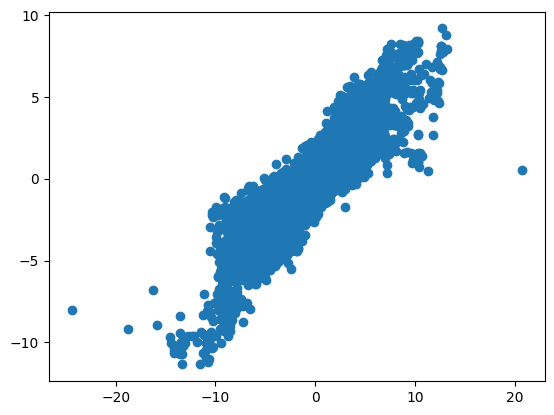

In [84]:
plt.scatter(y, oof_preds)